## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 3 
### McKenzie Gowing


Assignment 3 is worth 10% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values. 

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output. 

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation: 

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


### Question 1
Join the red wine and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all. (2 points)

The following questions will be answered for wine_data_all.



In [19]:
# INSERT YOUR ANSWER HERE
import pandas as pd
import numpy  as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels



whiteWine='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
redWine='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

whiteWine=pd.read_csv(whiteWine,sep=';')
redWine=pd.read_csv(redWine,sep=';')

wine_data_all=pd.concat([whiteWine,redWine])



### Question 2
Check the data types of the attributes. (2 points)

In [20]:
# INSERT YOUR ANSWER HERE

wine_data_all.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [21]:
# INSERT YOUR ANSWER HERE
wine_data_all.isnull().any()
print(wine_data_all.isnull().sum())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are not any missing values in the dataset.

### Question 4
What is the correlation between the attributes other than Quality? (8 points)

In [22]:
# INSERT YOUR ANSWER HERE
correlation_1=wine_data_all.drop(columns=['quality'])
correlation_1_matrix=correlation_1.corr()
correlation_1_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


The following pairs have the strongest correlation coefficients:

|Attribute Pair|Coefficient|Correlation Coefficient|
|---------------|----------|-----------------------|
|free sulfur dioxide - total sulfur dioxide|0.720934|Strong Correlation| 
|residual sugar - density|0.552517|Moderate Correlation|
|total sulfur dioxide - residual sugar|0.495482|Moderate Correlation|
|fixed acidity - density|0.458910|Moderate Correlation|
|free sulfur dioxide - residual sugar|0.402871|Moderate Correlation|

* Free sulfer dioxide & total sulfur dioxide have the strongest correlation.

### Question 5
Plot the frequency distribution of wine quality by using the Quality attribute. (8 points)

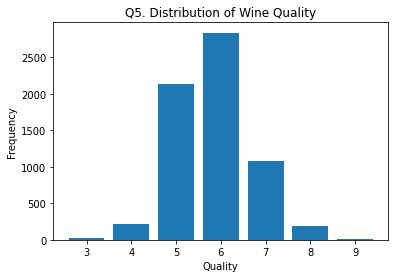

In [23]:
# INSERT YOUR ANSWER HERE
import matplotlib.pyplot as plt


quality_count = wine_data_all['quality'].value_counts()
quality_count = quality_count.sort_index()

plt.bar(quality_count.index,quality_count.values)

plt.title('Q5. Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

plt.show()


### Question 6
Reduce the levels of rating for quality to two levels, Pass and Fail. Assign the levels 3, 4, and 5 to level Fail; and 6, 7, 8, and 9 to level Pass. (10
points)

In [24]:
# INSERT YOUR ANSWER HERE

def pass_fail(quality):
    if quality in [3,4,5]: 
        return 'fail'
    else: 
        return "Pass"

wine_data_all['Pass_Fail'] = wine_data_all['quality'].apply(pass_fail)


### Question 7
Normalize the numeric attributes. Hint: (x - min(x)) / (max(x) - min(x)) (10 points)

In [25]:
# INSERT YOUR ANSWER HERE

def min_max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

wine_data_all['fixed acidity'] = min_max_normalize(wine_data_all['fixed acidity'])
wine_data_all['volatile acidity'] = min_max_normalize(wine_data_all['volatile acidity'])
wine_data_all['citric acid'] = min_max_normalize(wine_data_all['citric acid'])
wine_data_all['residual sugar'] = min_max_normalize(wine_data_all['residual sugar'])
wine_data_all['chlorides'] = min_max_normalize(wine_data_all['chlorides'])
wine_data_all['free sulfur dioxide'] = min_max_normalize(wine_data_all['free sulfur dioxide'])
wine_data_all['total sulfur dioxide'] = min_max_normalize(wine_data_all['total sulfur dioxide'])
wine_data_all['density'] = min_max_normalize(wine_data_all['density'])
wine_data_all['pH'] = min_max_normalize(wine_data_all['pH'])
wine_data_all['sulphates'] = min_max_normalize(wine_data_all['sulphates'])
wine_data_all['alcohol'] = min_max_normalize(wine_data_all['alcohol'])


print(wine_data_all.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.152778              0.377880  0.267785  0.217054   0.129213   
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   
3             0.159722              0.414747  0.163678  0.364341   0.101124   
4             0.159722              0.414747  0.163678  0.364341   0.101124   

    alcohol  quality Pass_Fail  
0  0.115942        6   

### Question 8
Divide the dataset to training and test sets. (10 points)

In [26]:
# INSERT YOUR ANSWER HERE

nrows=len(wine_data_all)

train_T_F =np.random.rand(nrows) < 0.65

WineTrainDS = wine_data_all[train_T_F]
WineTestDS = wine_data_all[~train_T_F]


print("Training dataset length is ",len(WineTrainDS), "and test dataset length is", len(WineTestDS))


Training dataset length is  4344 and test dataset length is 2153
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Pass_Fail                object
dtype: object


### Question 9
Use the Logistic Regression algorithm to predict the quality of wine using its attributes. (12 points)

In [30]:
# INSERT YOUR ANSWER HERE

logRegression=LogisticRegression()

logRegression.fit(WineTrainDS.drop(columns=['quality','Pass_Fail']),WineTrainDS['quality'])
WinePrediction = logRegression.predict(WineTestDS.drop(columns=['quality','Pass_Fail']))


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 10
Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [31]:
# INSERT YOUR ANSWER HERE
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(WineTrainDS.drop(columns=['quality','Pass_Fail']), WineTrainDS['quality'])
WineKnn_pred = knn.predict(WineTestDS.drop(columns= ['quality','Pass_Fail']))



### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [37]:
def plotmatrix(value,pred):
    labels=unique_labels(value)
    col = [f'Predict{label}' for label in labels]
    indi = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(value,pred),
                         columns=col,index=indi )
    return table

print('Knn Plot', plotmatrix(WineTestDS['quality'],WineKnn_pred))

Knn Plot          Predict3  Predict4  Predict5  Predict6  Predict7  Predict8  Predict9
Actual3         0         0         7         4         0         0         0
Actual4         0         3        37        21         3         0         0
Actual5         0         5       469       212        18         0         0
Actual6         0         1       245       599        98         7         0
Actual7         0         1        23       194       136         4         0
Actual8         0         0         2        24        37         2         0
Actual9         0         0         0         1         0         0         0


In [38]:
print('Regression plot',plotmatrix(WineTestDS['quality'],WinePrediction ) )

Regression plot          Predict3  Predict4  Predict5  Predict6  Predict7  Predict8  Predict9
Actual3         0         0         7         4         0         0         0
Actual4         0         0        41        22         1         0         0
Actual5         0         0       425       279         0         0         0
Actual6         0         0       215       693        42         0         0
Actual7         0         0        27       277        54         0         0
Actual8         0         0         6        44        15         0         0
Actual9         0         0         0         0         1         0         0


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. If you are using a package to calculate the values, you should explain what you understand from the output of the package by mentioning the exact accuracy, precision, and recall values in your own words. (12 points)


In [44]:
# Logistic Regression
from sklearn.metrics import classification_report
print(classification_report(WineTestDS['quality'],WinePrediction))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        64
           5       0.59      0.60      0.60       704
           6       0.53      0.73      0.61       950
           7       0.48      0.15      0.23       358
           8       0.00      0.00      0.00        65
           9       0.00      0.00      0.00         1

    accuracy                           0.54      2153
   macro avg       0.23      0.21      0.21      2153
weighted avg       0.50      0.54      0.50      2153



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [43]:
from sklearn.metrics import classification_report
print(classification_report(WineTestDS['quality'],WineKnn_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.30      0.05      0.08        64
           5       0.60      0.67      0.63       704
           6       0.57      0.63      0.60       950
           7       0.47      0.38      0.42       358
           8       0.15      0.03      0.05        65
           9       0.00      0.00      0.00         1

    accuracy                           0.56      2153
   macro avg       0.30      0.25      0.25      2153
weighted avg       0.54      0.56      0.54      2153



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The classification_report function shows the overall accuarcy, recall and preceision for each of the WineQualities. 

**Accuarcy**: Accuracy is used to understand the proportion of predictions we will get correct. The accuracy is higher for the KNN model.The overall accuarcy of the regression model shows that is accurately predicts the wine quality 54% of the time and the KNN model accurately predicts the wine quality 56% of the time. 

**Precision**: 
* Precision is the datapoints that we predicted as positive that are truely positive/correct. We see that for the regression model wine quality 5 & 6 have have the highest precisions, being 59% of wine quality 5 and 53% of wine quality 6. With the KNN model we see that again wine quality 5 & 6 have the highest precision (60% & 57%) rate but precision rate is higher for these wine qualities in this model than the regression model. 

**Recall**:
* Recall is the proportion of truely positive datapoints when the model predicts positive. In the regression model we see that wine quality 6 has the highest recall rate (73%) even though it has a lower precision than wine quality 5. Based on the recall, the regression is more likely to predict wine quality 5 wrong, than predicting wine quality 6 wrong. However, for the KNN model wine quality 5 has the highest recall rate with 67% followed by wine quality 6 with 63%. 


This is the end of Assignment 3

Ceni Babaoglu, PhD